# Les systèmes de recommandation


Les systèmes de recommandation visent à maximiser la consommation en proposant à l'utilisateur ou consommateur les éléments le plus susceptibles de l'intéresser.
Ces systèmes se basent sur caractéristiques des utilisateurs qui se ressemblent pour sa "prédiction", on distingue trois méthodes de comparaison pour ce type d'algorithmes :

    => Basé sur l'objet lui même, ou "content-based approach"
    => Basé sur la personne
    => Basé sur la société qui l'entoure et ses influences, ou "Collaborative filtering, context aware"
    => Ou bien basé sur un melange de ces trois donnée, appellé recommandation hybride
    
Aujourd'hui, les content based approch et les collaborative filtering !
Nous allons étudier des données de films, et leur évaluation par des utilisateurs.

In [43]:
#on commence a connaitre !
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Analyse des datas
Chargeons les données depuis le fichier 'u.data'

In [44]:
# Creez une liste de string user_id, item_id, rating et timestamp qui serviront de noms au colonnes
names = ["user_id", "item_id", "rating", "timestamp"]
# Lisez le fichier [pd.read_csv]
data = pd.read_csv("u.data", sep="\t",names=names)

data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Comme nous voyons, nous avons une colonne pour les users, une pour les films (item_id), une pour levaluation, et la dernière dont nous ne nous occuperons pas, désigme le moment auquel le film a été visionné en temps universel.<br>
Funfact : les gagnant du netflix_prize ont pimpés leur algorithme notamment avec un parametre deduisant le biais temporel.
<br>

Jetons un coup d'oeil au nombre d'items et d'users pour verifier l'integrité des données : (vous devriez obtenir 943 users et 1681 (correction 1682) items

In [45]:
# comptez le nombre d'user et de films
n_users = data["user_id"].nunique()
n_items = data["item_id"].nunique()
print (str(n_users) + ' users')
print (str(n_items) + ' items')

943 users
1682 items


Etudions les moyennes de chaque film

In [46]:
# Creez un dataframe 'films' contenant la moyenne des rating pour chaque film [pd.groupby] 
films = data.groupby(["item_id"])["rating"].mean()
filmsDF = pd.DataFrame(films)
films.head()
filmsDF.head()
#print(films.describe())

,rating
item_id,
1,3.878319
2,3.206107
3,3.033333
4,3.550239
5,3.302326


Regardons le nombre de ratings par film

In [47]:
# Rajoutez une colonne 'number_of_ratings' au dataframe films
filmsDF['number_of_ratings'] = data.groupby(["item_id"])["rating"].count()

filmsDF.head()

,rating,number_of_ratings
item_id,,
1,3.878319,452
2,3.206107,131
3,3.033333,90
4,3.550239,209
5,3.302326,86


Visualisons maintenant la distribution des avis.

(array([ 77.,  31., 105., 182., 233., 420., 335., 245.,  43.,  11.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

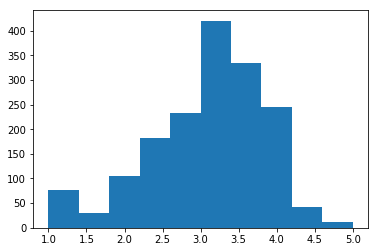

In [48]:
# affichez un histogramme de la colonne 'rating' [pls.hist()]
plt.hist(filmsDF["rating"], histtype='bar')

Puis la ponderation qui lui est associée...

(array([1.146e+03, 2.490e+02, 1.390e+02, 6.700e+01, 3.800e+01, 2.400e+01,
        7.000e+00, 5.000e+00, 6.000e+00, 1.000e+00]),
 array([  1. ,  59.2, 117.4, 175.6, 233.8, 292. , 350.2, 408.4, 466.6,
        524.8, 583. ]),
 <a list of 10 Patch objects>)

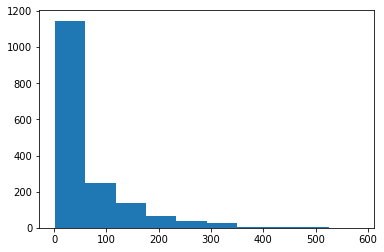

In [49]:
# affichez un histogramme de la colonne 'number_of_ratings' [pls.hist()]
plt.hist(filmsDF["number_of_ratings"], histtype='bar')

Et fusionnons les deux !

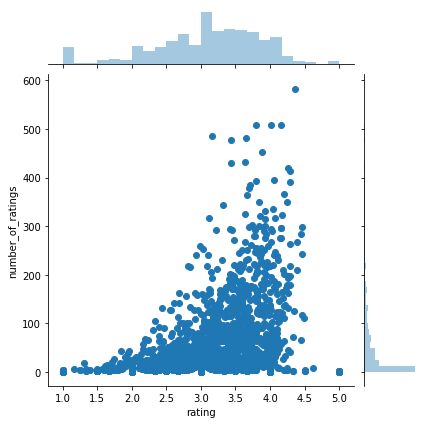

In [50]:
# creez un graphique en x rating et en y number_of_ratings [sns.joinplot]
sns.jointplot(filmsDF["rating"],filmsDF["number_of_ratings"])

Comme nous pouvons le voir la majorité des films n'ont que peu de rating.<br>
Notre dataset peut etre biaisé par ce defaut. Nous allons tout de meme continuer, et voir si les resultats sont coherents.

##  Mise en place du collaborative filtering

Decalons notre liste pour l'aligner sur l'index 0

In [51]:
ratings = np.zeros((n_users, n_items))
for row in data.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3]
ratings

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

Calculons maintenant l'indice de parcimonie (indiquant quel pourcentage des films chaque utilisateur a evalué en moyenne)

In [61]:
# initialisons a la taille totale de l'echantillon (le nombre de valeurs differentes de 0)
parcimonie = np.count_nonzero(ratings)
print(parcimonie)
# divisons par la taille totale de la matrice
parcimonie /= n_users * n_items
# multiplions par 100 pour ramener en %
parcimonie *= 100

print ('Parcimonie: {:4.2f}%'.format(parcimonie))

100000
Parcimonie: 6.30%


Divisons notre dataset en deux :

In [ ]:
def train_test_split(ratings):
    # Une matrice de 0 de la meme forme et taille que ratings
    test =
    # une copie de ratings
    train =
    # iterer sur le nombre de lignes de la matrice
    for in :
        # selectionnons des nombres au hasard
        test_ratings = np.random.choice(ratings[user, :].nonzero()[0], size=10, replace=False)
        #initialiser la case de train a 0.0
        
        #initialiser la case de test a la valeur correspondante dans ratings
        
    return train, test

In [ ]:
train, test = train_test_split(ratings)

Définissons une fonction calculant la similarité cosinus, <br>
elle est tres lente si faite en boucle for, utilisez les fonctions numpy dot et diagonal.<br>
Elle devra pouvoir s'appliquer soit aux users soit aux items ! [np.translate ; np.diagonal]

In [ ]:
# epsilon est la pour eviter les divisions par 0
def cosine_similarity(ratings, kind='user', epsilon=1e-9):
    # pour avoir la matrice des item il suffit de faire une translation de ratings.
    # Pour kind=item et kind=user il faut initialiser sim au produit matriciel de lui meme et de sa translation
    # Ne pas oublier d'ajouter epsilon a chaque case !
    if kind = 'user':
        sim =
    if kind = 'item':
        sim =
    # la racine carré de la diagonale de sim
    norms =
    # retournez sim divisé par norms divisé par la translation de norms. 
    return ()

In [ ]:
user_similarity = cosine_similarity(train, kind='user')
item_similarity = cosine_similarity(train, kind='item')

Definissons une fonction de prediction basique, qui prendra parti des map de similarité

In [ ]:
def predict(ratings, similarity, kind='user'):
    if kind == 'user':
        return similarity.dot(ratings) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif kind == 'item':
        # Indice : le produit matriciel est inversé et l'array de la somme n'est pas inverseé 
        return

Et une dernière pour calculer la fonction de cout "mean squared error"

In [ ]:
def cost(pred, actual):
    # calculer la moyenne du carré des distance entre les predictions et les vraies valeurs
    
    return error

Et on lance le tout !

In [ ]:
item_prediction = predict(train, item_similarity, kind='item')
user_prediction = predict(train, user_similarity, kind='user')

In [ ]:
print ('User-based cost : ' + cost(user_prediction, test))
print ('Item-based cost : ' + cost(item_prediction, test))

Vos valeurs doivent s'approcher de 8.3 pour le user-based et de 11.5 pour le item-based.

### Optimisation :

Comme nous l'avons vus sur le graph, les datas souffent de beaucoup de biais qu'il faut prendre en compte avant leur traitement<br>
Utilisons la methode top-k, qui consiste betement a ne prendre en compte que les k utilisateur les plus proches du notre.

In [ ]:
def predict_topk(ratings, similarity, kind='user', k=40):
    pred = np.zeros(ratings.shape)
    if kind == 'user':

    if kind == 'item':
       
    return pred

Comme vous allez le voir, le cout est maintenant divisé par deux !<br>
Ce genre d'optimisation est rapide a mettre en place, et tres efficace.<br>
Vous devriez obtenir autour de 6.5 pour les user-based et 7.8 pour les item-based.

In [ ]:
pred = predict_topk(train, user_similarity, kind='user', k=30)
print ('Top-k User-based cost : ' + str(cost(pred, test)))

pred = predict_topk(train, item_similarity, kind='item', k=15)
print ('Top-k Item-based cost : ' + str(cost(pred, test)))


## Hyperparameters customisation :
Nous allons maintenant tracer un graphique du cout en fonction des k-premiers utilisateurs, et voir comment potentiellement ameliorer les performances de l'algorithme :

In [ ]:
# valeurs de k a essayer
k_array = [5, 15, 30, 50, 100]
# Les 4 array a completer
user_train_cost = []
user_test_cost = []
item_test_cost = []
item_train_cost = []

for k in k_array:
    print(k)
    # predire pour user et item, avec la valeur actuelle de k
    user_pred =
    item_pred =
    
    # Ajouter aux differentes listes les couts pour le k actuel !
    user_train_cost += [cost(user_pred, train)]
    user_test_cost +=
    
    item_train_cost +=
    item_test_cost += 

In [ ]:
# Pour afficher le joli petit graph
pal = sns.color_palette("Set2", 2)


plt.figure(figsize=(8, 8))
plt.plot(k_array, user_train_cost, c=pal[0], label='User-based train', alpha=0.5, linewidth=5)
plt.plot(k_array, user_test_cost, c=pal[0], label='User-based test', linewidth=5)
plt.plot(k_array, item_train_cost, c=pal[1], label='Item-based train', alpha=0.5, linewidth=5)
plt.plot(k_array, item_test_cost, c=pal[1], label='Item-based test', linewidth=5)
plt.legend(loc='best', fontsize=20)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.xlabel('k', fontsize=30);
plt.ylabel('Cost', fontsize=30);

Ce graph represente le cout des differents set de data en fonction du nombre d'users pris en compte.<br>
Il va nous permettre de determiner quels sont les k ideaux !<br>
Nous pouvons voir ici que les valeurs les plus optimales sont autour de 40 pour le user-based test, et de 20 pour l'item-based test.

## Visualisation
Maintenant ajoutons les noms de film pour voir le resultat de notre travail !
Vous allez devoir ouvrir le fichier u.item, y lire les index de chaque film et les associer a leur nom dans un dictionnaire !

In [ ]:
movies_index = {}
# Lire le fichier "u.item" avec pour separateur '|', et remplir le dictionnaire avec ces données
# il y a des caracteres non reconnus  par l'UTF-8 dans ce ficier, utilisez l'argument "encoding = 'ISO-8859-1'"


def top_movies(similarity, movies_index, target_movie_index, k=6):
    # Trouver les k films les plus proches de celui fourni dans target_movie_index
    
    return

top_k_movies(item_similarity, movies_index, 500)

## Bonus
Essayez de mettre en place une fonction predict qui normalise les données des users, <br>
en prenant en compte leur note max et leur note min pour les ramener a une echelle de 0 a 5 individuellement.

In [ ]:
def predict_nobias(ratings, similarity, kind='user'):
    if kind == 'user':

    elif kind == 'item':
        
    return pred

In [ ]:
user_pred = predict_nobias(train, user_similarity, kind='user')
print ('Bias-subtracted User-based cost : ' + str(cost(user_pred, test)))

item_pred = predict_nobias(train, item_similarity, kind='item')
print ('Bias-subtracted Item-based cost : ' + str(cost(item_pred, test)))
